# Learning Data Augmentation

## Download Dataset

In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-06-03 05:44:00--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.128, 108.177.13.128, 74.125.26.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  82.2MB/s    in 0.8s    

2023-06-03 05:44:01 (82.2 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Extract Dataset and Define Directory

In [2]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## Create Model

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

## Preprocessing Data

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Training Model

In [6]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 23s - loss: 0.6900 - accuracy: 0.5170 - val_loss: 0.6788 - val_accuracy: 0.5130 - 23s/epoch - 232ms/step
Epoch 2/20
100/100 - 10s - loss: 0.6710 - accuracy: 0.5960 - val_loss: 0.6842 - val_accuracy: 0.5220 - 10s/epoch - 99ms/step
Epoch 3/20
100/100 - 12s - loss: 0.6438 - accuracy: 0.6185 - val_loss: 0.6659 - val_accuracy: 0.5820 - 12s/epoch - 119ms/step
Epoch 4/20
100/100 - 10s - loss: 0.6143 - accuracy: 0.6605 - val_loss: 0.6061 - val_accuracy: 0.6670 - 10s/epoch - 95ms/step
Epoch 5/20
100/100 - 9s - loss: 0.5807 - accuracy: 0.6805 - val_loss: 0.6156 - val_accuracy: 0.6680 - 9s/epoch - 95ms/step
Epoch 6/20
100/100 - 9s - loss: 0.5604 - accuracy: 0.7035 - val_loss: 0.6444 - val_accuracy: 0.6240 - 9s/epoch - 94ms/step
Epoch 7/20
100/100 - 11s - loss: 0.5458 - accuracy: 0.7220 - val_loss: 0.5724 - val_accuracy: 0.7060 - 11s/epoch - 107ms/step
Epoch 8/20
100/100 - 10s - loss: 0.5320 - accuracy: 0.7380 - val_loss: 0.5682 - val_accuracy: 0.7030 - 10s/epoch - 102ms/step


## Visualization Accuracy and Loss Model

In [7]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

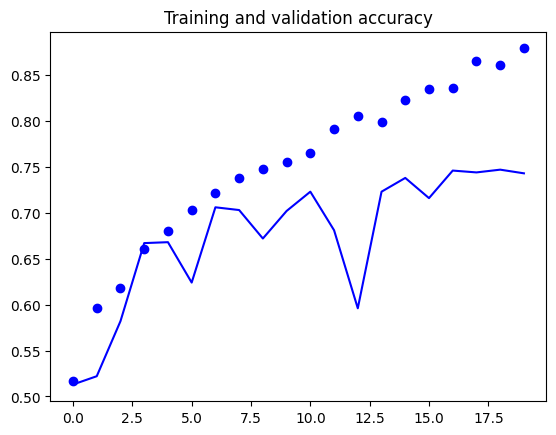

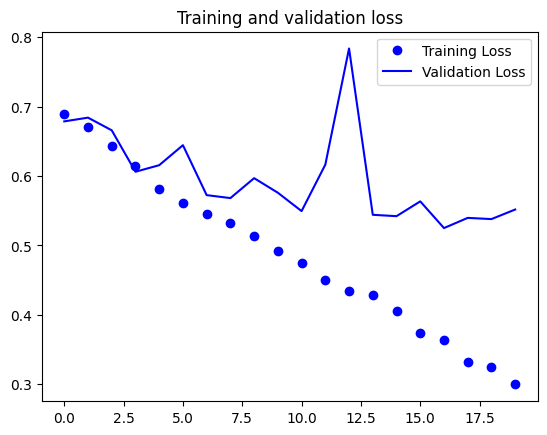

In [8]:
# Plot training results
plot_loss_acc(history)

## Use Data Augmentation

In [9]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 20s - loss: 0.6930 - accuracy: 0.5165 - val_loss: 0.6836 - val_accuracy: 0.5120 - 20s/epoch - 201ms/step
Epoch 2/20
100/100 - 19s - loss: 0.6836 - accuracy: 0.5435 - val_loss: 0.6694 - val_accuracy: 0.5960 - 19s/epoch - 190ms/step
Epoch 3/20
100/100 - 18s - loss: 0.6717 - accuracy: 0.5830 - val_loss: 0.6667 - val_accuracy: 0.5980 - 18s/epoch - 178ms/step
Epoch 4/20
100/100 - 19s - loss: 0.6641 - accuracy: 0.5985 - val_loss: 0.6729 - val_accuracy: 0.5650 - 19s/epoch - 188ms/step
Epoch 5/20
100/100 - 18s - loss: 0.6556 - accuracy: 0.6145 - val_loss: 0.6214 - val_accuracy: 0.6670 - 18s/epoch - 179ms/step
Epoch 6/20
100/100 - 19s - loss: 0.6416 - accuracy: 0.6280 - val_loss: 0.6099 - val_accuracy: 0.6450 - 19s/epoch - 190ms/step
Epoch 7/20
100/100 - 20s - loss: 0.6288 - accuracy: 0.6400 - val_loss: 0.5890 - val_accuracy: 0.6840 - 20s/epoch - 200ms/step
Epoch 8/20
100/100 - 18s - loss: 0

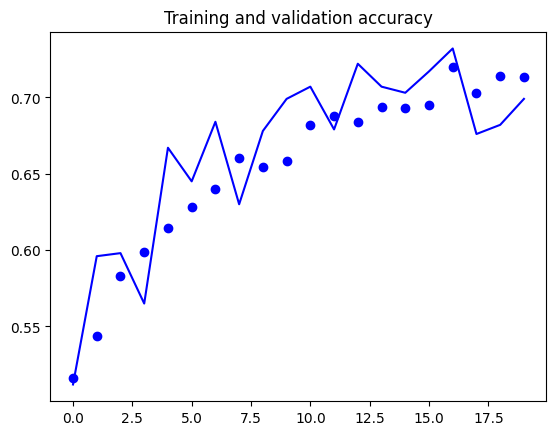

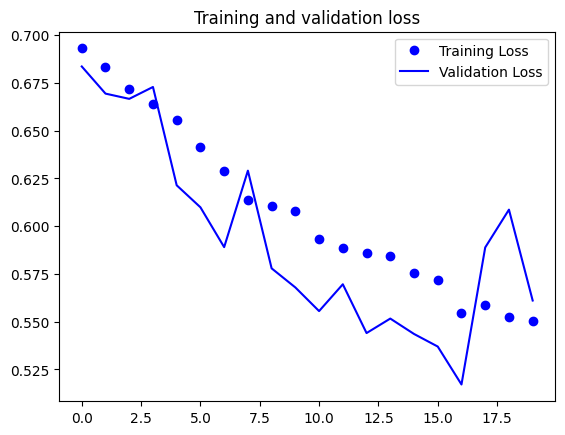

In [10]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)